Code from</br>

https://colab.research.google.com/github/probml/pyprobml/blob/master/notebooks/book2/04/student_pgm.ipynb#scrollTo=8FEYdsYCXYj5

In [9]:
import probml_utils.pgmpy_utils as pgm
from causalgraphicalmodels import CausalGraphicalModel
import pgmpy
import numpy as np
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

In [14]:
model = BayesianNetwork([('Diff', 'Grade'), ('Intel', 'Grade'), ('Grade', 'Letter'), ('Intel', 'SAT')])

In [19]:
# Define Individual CPD with state name
cpd_d_sn = TabularCPD(variable="Diff", variable_card=2, values=[[0.6], [0.4]], state_names={"Diff": ["Easy", "Hard"]})
cpd_i_sn = TabularCPD(variable="Intel", variable_card=2, values=[[0.7], [0.3]], state_names={"Intel": ["Low", "High"]})
cpd_g_sn = TabularCPD(
    variable="Grade",
    variable_card=3,
    values=[[0.3, 0.05, 0.9, 0.5], [0.4, 0.25, 0.08, 0.3], [0.3, 0.7, 0.02, 0.2]],
    evidence=["Intel", "Diff"],
    evidence_card=[2, 2],
    state_names={"Grade": ["A", "B", "C"], "Intel": ["Low", "High"], "Diff": ["Easy", "Hard"]},
)

cpd_l_sn = TabularCPD(
    variable="Letter",
    variable_card=2,
    values=[[0.1, 0.4, 0.99], [0.9, 0.6, 0.01]],
    evidence=["Grade"],
    evidence_card=[3],
    state_names={"Letter": ["Bad", "Good"], "Grade": ["A", "B", "C"]},
)

cpd_s_sn = TabularCPD(
    variable="SAT",
    variable_card=2,
    values=[[0.95, 0.2], [0.05, 0.8]],
    evidence=["Intel"],
    evidence_card=[2],
    state_names={"SAT": ["Bad", "Good"], "Intel": ["Low", "High"]},
)

# These defined CPDs can be added to the model. Since, the model already has CPDs associated to variables, it will
# show warning that pmgpy is now replacing those CPDs with the new ones.
model.add_cpds(cpd_d_sn, cpd_i_sn, cpd_g_sn, cpd_l_sn, cpd_s_sn)
model.check_model()

True

In [ ]:
for cpd in model.get_cpds():
    print(cpd)

## Inference

In [24]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)

In [36]:
evidence = {'Grade' : 'B'} # posterior given grade=B
postD = infer.query(['Diff'], evidence).values
print("Pr(Difficulty=Hard|Grade=B) = {:0.2f}".format(postD[1]))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Pr(Difficulty=Hard|Grade=B) = 0.37


## Visualization

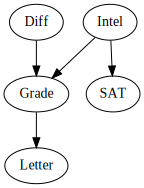

In [39]:
# DAG
model2 = CausalGraphicalModel(nodes=model.nodes(), edges=model.edges())
dot = model2.draw()
display(dot)

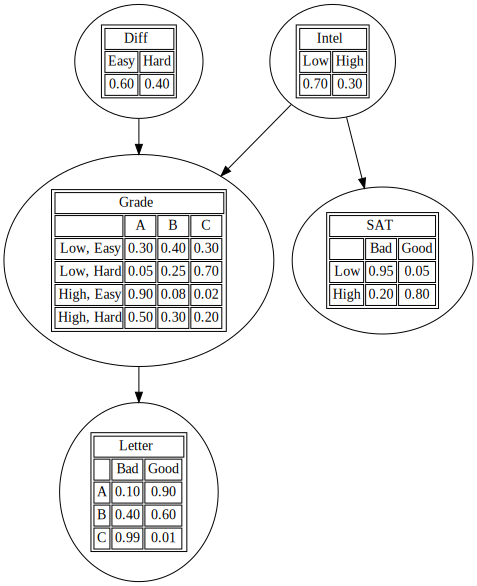

In [40]:
# CPT
dot = pgm.visualize_model(model)
display(dot)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

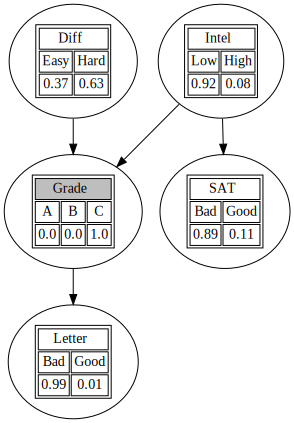

In [41]:
# marginal distribution
evidence = {'Grade' : 'C'}
marginals = pgm.get_marginals(model, evidence)
dot = pgm.visualize_marginals(model, evidence, marginals)
display(dot)